# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [139]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [140]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']


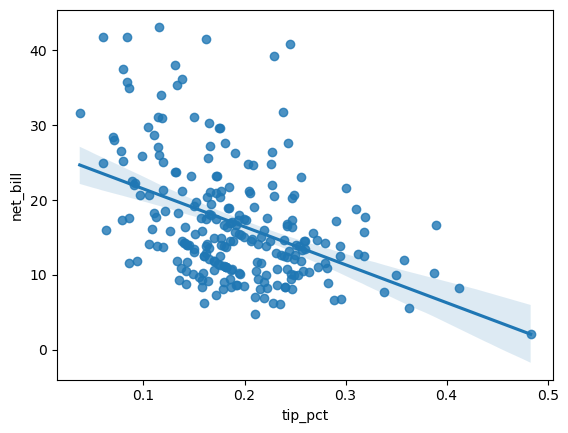

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        03:12:40   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
reg1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
sns.regplot(x = 'tip_pct', y = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.show()
reg1.summary()


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

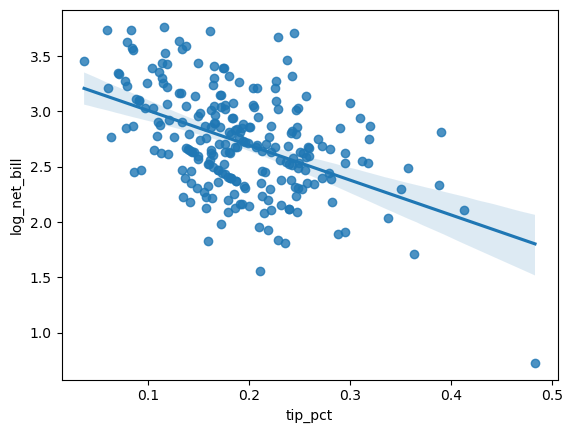

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.62e-13
Time:                        03:07:52   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444      0.000       0.512       0.724
log_net_bill    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
tips['log_net_bill'] = np.log(tips['net_bill'])
reg2 = smf.ols('tip_pct ~ log_net_bill', data = tips).fit()
sns.regplot(x = 'tip_pct', y = 'log_net_bill', data = tips[tips['tip_pct']<.5])
plt.show()
reg2.summary()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

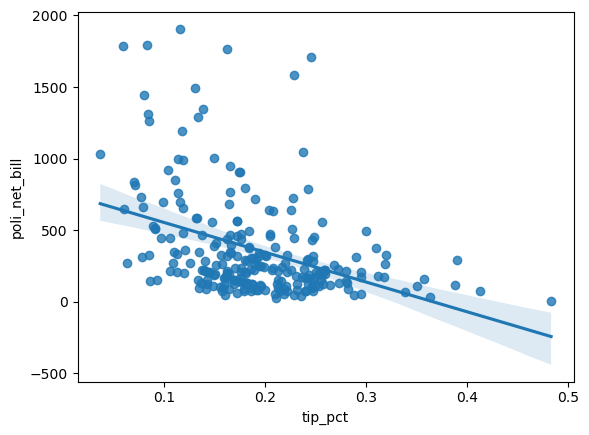

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     13.70
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           0.000265
Time:                        03:08:51   Log-Likelihood:                 103.04
No. Observations:                 244   AIC:                            -202.1
Df Residuals:                     242   BIC:                            -195.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2400      0.014     16.606      0.000       0.212       0.269
poli_net_bill    -0.0001   2.82e-05     -3.701      0.000      -0.000   -4.89e-05
==============================================================================
Omnibus:                      471.901   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242240.631
Skew:                          11.259   Prob(JB):                         0.00
Kurtosis:                     155.708   Cond. No.                         726.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
tips['poli_net_bill'] = (tips['net_bill'] + np.power(tips['net_bill'], 2))
reg3 = smf.ols('tip_pct ~ poli_net_bill', data = tips).fit()
tips['resid'] = reg3.resid
sns.regplot(x = 'tip_pct', y = 'poli_net_bill', data = tips[tips['tip_pct']<.5])
plt.show()
reg3.summary()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

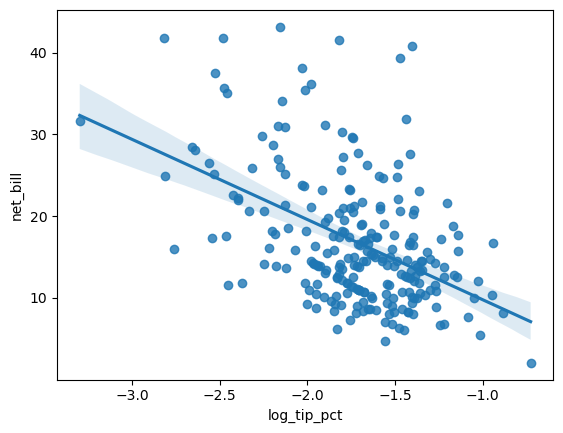

O R² é 0.23534487140864313


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           8.27e-16
Time:                        03:11:48   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
tips['log_tip_pct'] = np.log(tips['tip_pct'])
reg4 = smf.ols('log_tip_pct ~ net_bill', data = tips).fit()
sns.regplot(x = 'log_tip_pct', y = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.show()
# R²
print(f'O R² é {reg4.rsquared}') 
reg4.summary()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

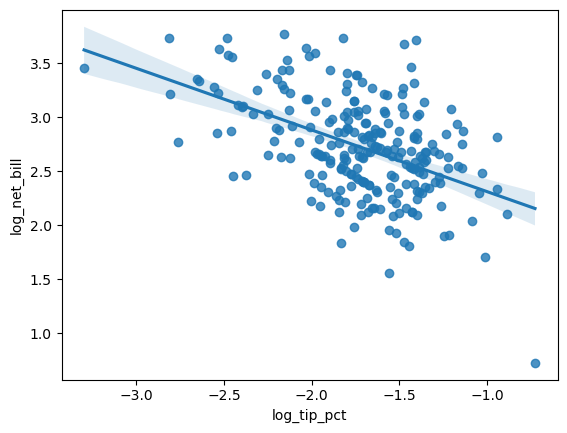

O R² é 0.2934740215080778


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           5.20e-20
Time:                        03:12:12   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961      0.003      -0.657      -0.132
log_net_bill    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:

reg5 = smf.ols('log_tip_pct ~ log_net_bill', data = tips).fit()
sns.regplot(x = 'log_tip_pct', y = 'log_net_bill', data = tips[tips['tip_pct']<.5])
plt.show()

# R²
print(f'O R² é {reg5.rsquared}') 

reg5.summary()

###  6. qual modelo resultou no melhor ajuste?

In [158]:
print(f'O melhor modelo é onde se aplica o log(tip_pct) e log(net_bill), onde o R² é {reg5.rsquared}')


O melhor modelo é onde se aplica o log(tip_pct) e log(net_bill), onde o R² é 0.2934740215080778
